Nama : Nabila Aprillia

NPM  : 2108107010025

Dataset

dataset yang saya ambil berasal dari Kaggle: https://www.kaggle.com/datasets/hassanoukhouya/energycsv 

*Dataset yang disebutkan dalam sumber adalah dataset "energy" yang mencakup data beban listrik dari September 1, 2014, hingga Desember 31, 2014. Data ini memprediksi beban listrik.

*Informasi Atribut: 
1. timestamp
2. load
3. temp

Studi Kasus : Memprediksi Beban listrik yang dipakai dari September 1, 2014, hingga Desember 31, 2014

### Import Library

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np

In [181]:
df = pd.read_csv('data/energy.csv')
df.head()

,timestamp,load,temp
0,2012-01-01 00:00:00,2698.0,32.000000
1,2012-01-01 01:00:00,2558.0,32.666667
2,2012-01-01 02:00:00,2444.0,30.000000
3,2012-01-01 03:00:00,2402.0,31.000000
4,2012-01-01 04:00:00,2403.0,32.000000


In [182]:
# informasi umum kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  26304 non-null  object 
 1   load       26304 non-null  float64
 2   temp       26304 non-null  float64
dtypes: float64(2), object(1)
memory usage: 616.6+ KB


In [183]:
# informasi statistik dari dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
load,26304.0,3303.769199,564.579253,1979.000000,2867.000000,3364.000000,3690.000000,5224.0
temp,26304.0,47.765638,19.338142,-13.666667,32.666667,48.333333,63.666667,95.0


In [184]:
# cek apakah ada missing value pada dataset
df.isnull().sum()

timestamp    0
load         0
temp         0
dtype: int64

In [185]:
# cek apakah ada duplikat data pada dataset
df.duplicated().sum()

0

### Prepocessing Data

In [186]:
# Konversi timestamp ke tipe data datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Normalisasi data

In [187]:
# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
df[['load', 'temp']] = scaler.fit_transform(df[['load', 'temp']])

### Split Dataset 

In [188]:
# Membagi data menjadi fitur (X) dan target (y)
X = df[['temp']]
y = df['load']

In [189]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Membangun Model

In [190]:
# Membangun model SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

SVR()

In [191]:
# Memprediksi menggunakan model yang telah dibangun
y_pred = svr_model.predict(X_test)

In [192]:
from sklearn.metrics import mean_squared_error
# Menghitung mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.7367301678686033


Membangun model prediksi SVR dan menghasilkan prediksi dengan skor 

*MSE : 0.7367301678686033

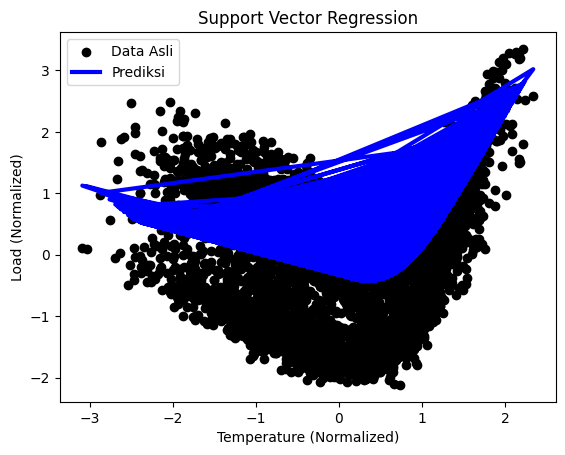

In [193]:
# Plot hasil prediksi
plt.scatter(X_test, y_test, color='black', label='Data Asli')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Prediksi')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Load (Normalized)')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Dari hasil plot diatas, Model SVR dengan kernel rbf menghasilkan prediksi beban listrik yang dipakai dengan mengoptimalkan penggunaan listrik

Polynomial equation:
        3          2
0.1981 x + 0.4855 x - 0.3247 x - 0.2666


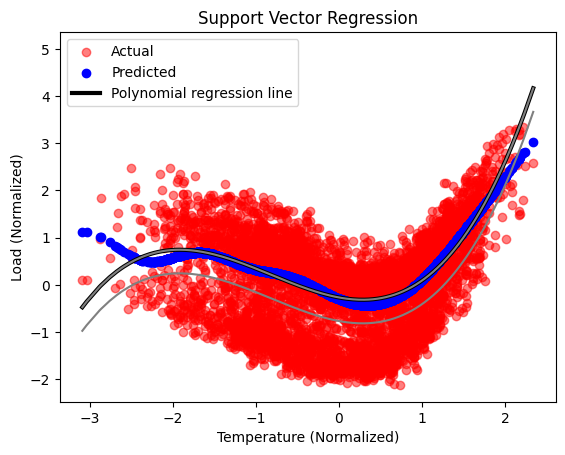

In [203]:
# Sort the test data and predicted data
sorted_indices = np.argsort(X_test.iloc[:, 0], axis=0)
X_test_sorted = X_test.iloc[:, 0].values[sorted_indices].reshape(-1, 1)
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial curve
coefficients = np.polyfit(X_test_sorted.flatten(), y_pred_sorted, 3)
polynomial = np.poly1d(coefficients)

# Print the polynomial equation
print("Polynomial equation:")
print(polynomial)

# Plot data points
plt.scatter(X_test.iloc[:, 0], y_test, alpha=0.5, color='red', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred, color='blue', label='Predicted')

# Plot polynomial curve
plt.plot(X_test_sorted, polynomial(X_test_sorted), color='black', label='Polynomial regression line', linewidth=3)
plt.plot(X_test_sorted, polynomial(X_test_sorted)-0.5, color='gray', )
plt.plot(X_test_sorted, polynomial(X_test_sorted)+0,5, color='gray')
plt.title('Support Vector Regression') 
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Load (Normalized)')
plt.legend()
plt.show()


Persamaan polynomial yang dihasilkan adalah 0.1981 x + 0.4855 x - 0.3247 x - 0.2666

Persamaan menunjukkan peningkatan beban seiring dengan meningkatnya suhu pengonsumsian energi.